In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf

# 10. Introduction to Artificial Neural Networks with Keras
Birds inspired us to fly, burdock plants inspired Velcro, and nature has inspired countless more inventions. It seems only logical, then, to look at the brain’s architecture for inspiration on how to build an intelligent machine. This is the logic that sparked artificial neural networks (`ANN`): an `ANN` is a Machine Learning model inspired by the networks of biological neurons found in our brains. However, although planes were inspired by birds, they don’t have to flap their wings. Similarly, `ANN` have gradually become quite different from their biological cousins. Some researchers even argue that we should drop the biological analogy altogether (e.g., by saying `units` rather than `neurons`), lest we restrict our creativity to biologically plausible systems.

`ANN` are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go (DeepMind’s AlphaGo).

The first part of this chapter introduces artificial neural networks, starting with a quick tour of the very first `ANN` architectures and leading up to Multilayer Perceptrons (`MLP`), which are heavily used today (other architectures will be explored in the next chapters). In the second part, we will look at how to implement neural networks using the popular `Keras` API. This is a beautifully designed and simple high-level API for building, training, evaluating, and running neural networks. But don’t be fooled by its simplicity: it is expressive and flexible enough to let you build a wide variety of neural network architectures. In fact, it will probably be sufficient for most of your use cases. And should you ever need extra flexibility, you can always write custom `Keras` components using its lower-level API, as we will see in `Chapter 12`.

But first, let’s go back in time to see how artificial neural networks came to be!

## 10.1 From Biological to Artificial Neurons
Surprisingly, `ANN` have been around for quite a while: they were first introduced back in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts. In their landmark paper `A Logical Calculus of Ideas Immanent in Nervous Activity`, McCulloch and Pitts presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using propositional logic. This was the first artificial neural network architecture. Since then many other architectures have been invented, as we will see.

The early successes of `ANN` led to the widespread belief that we would soon be conversing with truly intelligent machines. When it became clear in the 1960s that this promise would go unfulfilled (at least for quite a while), funding flew elsewhere, and `ANN` entered a long winter. In the early 1980s, new architectures were invented and better training techniques were developed, sparking a revival of interest in connectionism (the study of neural networks). But progress was slow, and by the 1990s other powerful Machine Learning techniques were invented, such as `Support Vector Machines` (see `Chapter 5`). These techniques seemed to offer better results and stronger theoretical foundations than `ANN`, so once again the study of neural networks was put on hold.

We are now witnessing yet another wave of interest in `ANN`. Will this wave die out like the previous ones did? Well, here are a few good reasons to believe that this time is different and that the renewed interest in `ANN` will have a much more profound impact on our lives:
+ There is now a huge quantity of data available to train neural networks, and `ANN` frequently outperform other ML techniques on very large and complex problems.
+ The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.
+ The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.
+ Some theoretical limitations of `ANN` have turned out to be benign in practice. For example, many people thought that `ANN` training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (and when it is the case, they are usually fairly close to the global optimum).
+ `ANN` seem to have entered a virtuous circle of funding and progress. Amazing products based on `ANN` regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress and even more amazing products.

### 10.1.1 Biological Neurons
Before we discuss artificial neurons, let’s take a quick look at a biological neuron (represented in `Figure 10-1`). It is an unusual-looking cell mostly found in animal brains. It’s composed of a cell body containing the nucleus and most of the cell’s complex components, many branching extensions called dendrites, plus one very long extension called the axon. The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called telodendria, and at the tip of these branches are minuscule structures called synaptic terminals (or simply synapses), which are connected to the dendrites or cell bodies of other neurons. 3 Biological neurons produce short electrical impulses called action potentials (APs, or just signals) which travel along the axons and make the synapses release chemical signals called neurotransmitters. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).

<img src="images/10_01.png" style="width:500px;"/>

Thus, individual biological neurons seem to behave in a rather simple way, but they are organized in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants. The architecture of biological neural networks (`BNN`) is still the subject of active research, but some parts of the brain have been mapped, and it seems that neurons are often organized in consecutive layers, especially in the cerebral cortex (i.e., the outer layer of your brain), as shown in `Figure 10-2`.

<img src="images/10_02.png" style="width:500px;"/>

### 10.1.2 Logical Computations with Neurons
McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. In their paper, they showed that even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition you want. To see how such a network works, let’s build a few ANNs that perform various logical computations (see `Figure 10-3`), assuming that a neuron is activated when at least two of its inputs are active.

<img src="images/10_03.png" style="width:500px;"/>

Let’s see what these networks do:
+ The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.
+ The second network performs a logical `AND`: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).
+ The third network performs a logical `OR`: neuron C gets activated if either neuron A or neuron B is activated (or both).
+ Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical `NOT`: neuron C is active when neuron B is off, and vice versa.

You can imagine how these networks can be combined to compute complex logical expressions (see the exercises at the end of the chapter for an example).

### 10.1.3 The Perceptron
The Perceptron is one of the simplest `ANN` architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (see `Figure 10-4`) called a `threshold logic unit` (`TLU`), or sometimes a `linear threshold unit` (`LTU`). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The `TLU` computes a weighted sum of its inputs ($z = w_1x_1 + w_2x_2+ \dots + w_nx_n= \textbf{x}^{\top}\textbf{w}$), then applies a step function to that sum and outputs the result: $h_w(\textbf{x}) = step(z)$, where $z = \textbf{x}^{\top}\textbf{w}$.

<img src="images/10_04.png" style="width:500px;"/>

The most common step function used in Perceptrons is the `Heaviside step function` (see `Equation 10-1`). Sometimes the `sign` function is used instead.

<img src="images/e_10_01.png" style="width:500px;"/>

A single `TLU` can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a `Logistic Regression` or `linear SVM classifier`). You could, for example, use a single `TLU` to classify iris flowers based on petal length and width (also adding an extra bias feature $x_0 = 1$, just like we did in previous chapters). Training a `TLU` in this case means finding the right values for $w_0, w_1, \text{and} w_2$ (the training algorithm is discussed shortly).

A Perceptron is simply composed of a single layer of `TLU`s, 7 with each `TLU` connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a `fully connected layer`, or a `dense layer`. The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added ($x_0 = 1$): it is typically represented using a special type of neuron called a bias neuron, which outputs 1 all the time. A Perceptron with two inputs and three outputs is represented in `Figure 10-5`. This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

<img src="images/10_05.png" style="width:500px;"/>

Thanks to the magic of linear algebra, `Equation 10-2` makes it possible to efficiently compute the outputs of a layer of artificial neurons for several instances at once.

**Equation 10-2. Computing the outputs of a fully connected layer**

$h_{W,b}(\textbf{X}) = \phi(\textbf{XW} + b)$

In this equation:
+ As always, $\textbf{X}$ represents the matrix of input features. It has one row per instance and one column per feature.
+ The weight matrix $\textbf{W}$ contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer.
+ The bias vector $\textbf{b}$ contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
+ The function $\phi$ is called the `activation function`: when the artificial neurons are `TLU`s, it is a `step function` (but we will discuss other `activation functions` shortly).

So, how is a Perceptron trained? The Perceptron training algorithm proposed by Rosenblatt was largely inspired by Hebb’s rule. In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or Hebbian learning). Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the Perceptron learning rule reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. The rule is shown in `Equation 10-3`.

**Equation 10-3. Perceptron learning rule (weight update)**

$w_{i,j}^{(\text{next step})} = w_{i,j} + \eta(y_j − \hat{y}_j) x_i$

In this equation:
+ $w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
+ $x_i$ is the $i^{th}$ input value of the current training instance.
+ $\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.
+ $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.
+ $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like `Logistic Regression classifiers`). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the `Perceptron convergence theorem`.

`Scikit-Learn` provides a Perceptron class that implements a single-TLU network. It can be used pretty much as you would expect—for example, on the iris dataset (introduced in Chapter 4):

```python 
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris 
import numpy as np

iris = load_iris() 
X = iris.data[:, (2, 3)] # petal length, petal width 
y = (iris.target == 0).astype(np.int) # Iris setosa?

per_clf = Perceptron() 
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
```

You may have noticed that the Perceptron learning algorithm strongly resembles `Stochastic Gradient Descent`. In fact, `Scikit-Learn`’s Perceptron class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron", learning_rate="constant", eta0=1` (the learning rate), and `penalty=None` (no regularization).

Note that contrary to `Logistic Regression classifiers`, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer `Logistic Regression` over Perceptrons.

In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the `Exclusive OR` (`XOR`) classification problem; see the left side of `Figure 10-6`). This is true of any other linear classification model (such as `Logistic Regression classifiers`), but researchers had expected much more from Perceptrons, and some were so disappointed that they dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, and search.

It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting `ANN` is called a `Multilayer Perceptron` (`MLP`). An `MLP` can solve the `XOR` problem, as you can verify by computing the output of the `MLP` represented on the right side of `Figure 10-6`: with inputs `(0, 0)` or `(1, 1)`, the network outputs 0, and with inputs `(0, 1)` or `(1, 0)` it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown. Try verifying that this network indeed solves the `XOR` problem!

<img src="images/10_06.png" style="width:500px;"/>

### 10.1.4 The Multilayer Perceptron and Backpropagation
An `MLP` is composed of one (passthrough) input layer, one or more layers of `TLU`s, called `hidden layers`, and one final layer of `TLU`s called the `output layer` (see `Figure 10-7`). The layers close to the input layer are usually called the `lower layers`, and the ones close to the outputs are usually called the `upper layers`. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

<img src="images/10_07.png" style="width:500px;"/>

> The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a `feedforward neural network` (`FNN`).

When an `ANN` contains a deep stack of hidden layers, it is called a `deep neural network` (`DNN`). The field of Deep Learning studies `DNN`s, and more generally models containing deep stacks of computations. Even so, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train `MLP`s, without success. But in 1986, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a groundbreaking paper that introduced the backpropagation training algorithm, which is still used today. In short, it is `Gradient Descent` (introduced in `Chapter 4`) using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular `Gradient Descent` step, and the whole process is repeated until the network converges to the solution.

> Automatically computing gradients is called `automatic differentiation`, or `autodiff`. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called reverse-mode autodiff. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g., connection weights) and few outputs (e.g., one loss). If you want to learn more about autodiff, check out `Appendix D`.

Let’s run through this algorithm in a bit more detail:
+ It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
+ Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
+ Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
+ Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.
+ The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
+ Finally, the algorithm performs a `Gradient Descent` step to tweak all the connection weights in the network, using the error gradients it just computed.

This algorithm is so important that it’s worth summarizing it again: for each training instance, the backpropagation algorithm first makes a prediction (`forward pass`) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (`reverse pass`), and finally tweaks the connection weights to reduce the error (`Gradient Descent step`).

> It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

In order for this algorithm to work properly, its authors made a key change to the `MLP`’s architecture: they replaced the step function with the logistic (`sigmoid`) function, $\sigma(z) = \displaystyle\frac{1}{(1 + e^{–z})}$. This was essential because the step function contains only flat segments, so there is no gradient to work with (`Gradient Descent` cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing `Gradient Descent` to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the logistic function. Here are two other popular choices:
+ **The hyperbolic tangent function: $tanh(z) = 2\sigma(2z) – 1$**

    Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
    
+ **The Rectified Linear Unit function: ReLU(z) = max(0, z)**
    
    The ReLU function is continuous but unfortunately not differentiable at $z = 0$ (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for $z < 0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during `Gradient Descent` (we will come back to this in `Chapter 11`).

These popular activation functions and their derivatives are represented in `Figure 10-8`. But wait! Why do we need activation functions in the first place? Well, if you chain several linear transformations, all you get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1$. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough `DNN` with nonlinear activations can theoretically approximate any continuous function.

<img src="images/10_08.png" style="width:500px;"/>

OK! You know where neural nets came from, what their architecture is, and how to compute their outputs. You’ve also learned about the backpropagation algorithm. But what exactly can you do with them?

### 10.1.5 Regression MLPs
First, `MLP`s can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

In general, when building an `MLP` for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. If you want to guarantee that the output will always be positive, then you can use the `ReLU` activation function in the output layer. Alternatively, you can use the softplus activation function, which is a smooth variant of `ReLU`: $\text{softplus}(\textbf{z}) = \log(1 + e^z)$. It is close to $0$ when $\textbf{z}$ is negative, and close to $\textbf{z}$ when $\textbf{z}$ is positive. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range: 0 to 1 for the logistic function and –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the `mean squared error` (`MSE`), but if you have a lot of outliers in the training set, you may prefer to use the `mean absolute error` (`MAE`) instead. Alternatively, you can use the `Huber loss`, which is a combination of both.

> The Huber loss is quadratic when the error is smaller than a threshold $\delta$ (typically 1) but linear when the error is larger than $\delta$. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error.

<img src="images/t_10_01.png" style="width:600px;"/>

### 10.1.6 Classification MLPs
`MLP`s can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the `logistic activation function`: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

`MLP`s can also easily handle multilabel binary classification tasks (see `Chapter 3`). For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the `logistic activation function`: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the `softmax activation function` for the whole output layer (see `Figure 10-9`). The `softmax function` (introduced in `Chapter 4`) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called `multiclass classification`.

<img src="images/10_09.png" style="width:500px;"/>

Regarding the loss function, since we are predicting probability distributions, the `cross-entropy loss` (also called the `log loss`, see `Chapter 4`) is generally a good choice.

<img src="images/t_10_02.png" style="width:600px;"/>

> Before we go on, I recommend you go through exercise 1 at the end of this chapter. You will play with various neural network architectures and visualize their outputs using the `TensorFlow Playground`. This will be very useful to better understand `MLP`s, including the effects of all the hyperparameters (number of layers and neurons, activation functions, and more).

Now you have all the concepts you need to start implementing `MLP`s with `Keras`!

## 10.2 Implementing MLPs with Keras
`Keras` is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. Its documentation (or specification) is available at [keras.io](https://keras.io/). The reference implementation, also called `Keras`, was developed by François Chollet as part of a research project and was released as an open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design. To perform the heavy computations required by neural networks, this reference implementation relies on a computation backend. At present, you can choose from three popular open source Deep Learning libraries: `TensorFlow`, `Microsoft Cognitive Toolkit` (`CNTK`), and `Theano`. Therefore, to avoid any confusion, we will refer to this reference implementation as multibackend `Keras`.

Since late 2016, other implementations have been released. You can now run `Keras` on `Apache MXNet`, Apple’s `Core ML`, JavaScript or TypeScript (to run `Keras` code in a web browser), and `PlaidML` (which can run on all sorts of GPU devices, not just Nvidia). Moreover, `TensorFlow` itself now comes bundled with its own `Keras` implementation, `tf.keras`. It only supports `TensorFlow` as the backend, but it has the advantage of offering some very useful extra features (see `Figure 10-10`): for example, it supports `TensorFlow`’s Data API, which makes it easy to load and preprocess data efficiently. For this reason, we will use `tf.keras` in this book. However, in this chapter we will not use any of the `TensorFlow`-specific features, so the code should run fine on other `Keras` implementations as well (at least in Python), with only minor modifications, such as changing the imports.

<img src="images/10_10.png" style="width:600px;"/>

The most popular Deep Learning library, after `Keras` and `TensorFlow`, is Facebook’s `PyTorch` library. The good news is that its API is quite similar to `Keras`’s (in part because both APIs were inspired by `Scikit-Learn` and `Chainer`), so once you know `Keras`, it is not difficult to switch to `PyTorch`, if you ever want to. `PyTorch`’s popularity grew exponentially in 2018, largely thanks to its simplicity and excellent documentation, which were not `TensorFlow 1.x`’s main strengths. However, `TensorFlow 2` is arguably just as simple as `PyTorch`, as it has adopted `Keras` as its official high-level API and its developers have greatly simplified and cleaned up the rest of the API. The documentation has also been completely reorganized, and it is much easier to find what you need now. Similarly, `PyTorch`’s main weaknesses (e.g., limited portability and no computation graph analysis) have been largely addressed in `PyTorch 1.0`. Healthy competition is beneficial to everyone.

All right, it’s time to code! As `tf.keras` is bundled with `TensorFlow`, let’s start by installing `TensorFlow`.

### 10.2.1 Installing TensorFlow 2
[skit]

### 10.2.2 Building an Image Classifier Using the Sequential API
First, we need to load a dataset. In this chapter we will tackle `Fashion MNIST`, which is a drop-in replacement of `MNIST` (introduced in `Chapter 3`). It has the exact same format as `MNIST` (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than `MNIST`. For example, a simple linear model reaches about `92%` accuracy on `MNIST`, but only about `83%` on Fashion MNIST.

##### Using Keras to load the dataset
`Keras` provides some utility functions to fetch and load common datasets, including `MNIST`, `Fashion MNIST`, and the `California housing dataset` we used in `Chapter 2`. Let’s load `Fashion MNIST`:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading `MNIST` or `Fashion MNIST` using `Keras` rather than `Scikit-Learn`, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using `Gradient Descent`, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

With `MNIST`, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For `Fashion MNIST`, however, we need the list of class names to know what we are dealing with:

In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", 
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents a coat:

In [6]:
class_names[y_train[0]]

'Coat'

`Figure 10-11` shows some samples from the `Fashion MNIST` dataset.

<img src="images/10_11.png" style="width:600px;"/>

##### Creating the model using the Sequential API
Now let’s build the neural network! Here is a classification `MLP` with two hidden layers:

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:
+ The first line creates a `Sequential` model. This is the simplest kind of `Keras` model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the `Sequential` API.
+ Next, we build the first layer and add it to the model. It is a `Flatten layer` whose role is to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape`, which doesn’t include the `batch size`, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `input_shape=[28,28]`.
+ Next we add a `Dense hidden layer` with 300 neurons. It will use the `ReLU` activation function. Each `Dense layer` manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes `Equation 10-2`.
+ Then we add a second `Dense hidden layer` with 100 neurons, also using the `ReLU` activation function.
+ Finally, we add a `Dense output layer` with 10 neurons (one per class), using the `softmax` activation function (because the classes are exclusive).

> Specifying `activation="relu"` is equivalent to specifying `activation=keras.activations.relu`. Other activation functions are available in the `keras.activations` package, we will use many of them in this book. See [keras' activation function](https://keras.io/activations/) for the full list.

Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the `Sequential` model:

```python
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
```

> **Using Code Examples from keras.io**
> 
> Code examples documented on `keras.io` will work fine with `tf.keras`, but you need to change the imports. For > example, consider this keras.io code:
> 
> ```python 
> from keras.layers import Dense 
> output_layer = Dense(10)
> ```
> 
> You must change the imports like this:
> ```python
> from tensorflow.keras.layers import Dense 
> output_layer = Dense(10)
> ```
> Or simply use full paths, if you prefer:
> ```python
> from tensorflow import keras 
> output_layer = keras.layers.Dense(10)
> ```
> This approach is more verbose, but I use it in this book so you can easily see which packages to use, and to avoid confusion between standard classes and custom classes. In production code, I prefer the previous approach. Many people also use `from tensorflow.keras import layers` followed by `layers.Dense(10)`.

The model’s `summary()` method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (`None` means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters (we will see examples of non-trainable parameters in `Chapter 11`):

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that `Dense layers` often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this later.

You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` methods. For a `Dense layer`, this includes both the connection weights and the bias terms:

In [12]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [13]:
biases.shape

(300,)

Notice that the `Dense layer` initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were initialized to zeros, which is fine. If you ever want to use a different initialization method, you can set `kernel_initializer` (kernel is another name for the matrix of connection weights) or `bias_initializer` when creating the layer. We will discuss initializers further in `Chapter 11`, but if you want the full list, see [keras initializer](https://keras.io/initializers/).

> The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the `input_shape` when creating the first layer in a `Sequential` model. However, if you do not specify the input shape, it’s OK: `Keras` will simply wait until it knows the input shape before it actually builds the model. This will happen either when you feed it actual data (e.g., during training), or when you call its `build()` method. Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model). So, if you know the input shape when creating the model, it is best to specify it.

##### Compiling the model
After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [14]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])

> Using `loss="sparse_categorical_crossentropy"` is equivalent to using `loss=keras.losses.sparse_categorical_crossentropy`. Similarly, specifying `optimizer="sgd"` is equivalent to specifying `optimizer=keras.optimizers.SGD()`, and `metrics=["accuracy"]` is equivalent to `metrics=[keras.metrics.sparse_categorical_accuracy]` (when using this loss). We will use many other losses, optimizers, and metrics in this book; for the full lists, see [keras loss functions](https://keras.io/losses), [keras optimizers](https://keras.io/optimizers), and [keras metrics](https://keras.io/metrics).

This code requires some explanation. First, we use the "sparse_categorical_cross entropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

> If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the `keras.utils.to_categorical()` function. To go the other way round, use the `np.argmax()` function with `axis=1`.

Regarding the optimizer, "sgd" means that we will train the model using simple `Stochastic Gradient Descent`. In other words, `Keras` will perform the backpropagation algorithm described earlier (i.e., reverse-mode `autodiff` plus `Gradient Descent`). We will discuss more efficient optimizers in `Chapter 11` (they improve the `Gradient Descent` part, not the `autodiff`).

> When using the `SGD` optimizer, it is important to tune the `learning rate`. So, you will generally want to use `optimizer=keras.optimizers.SGD(lr=???)` to set the learning rate, rather than `optimizer="sgd"`, which defaults to `lr=0.01`.

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.

##### Training and evaluating the model
Now the model is ready to be trained. For this we simply need to call its `fit()` method:

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7400 - accuracy: 0.7541 - val_loss: 0.5239 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4932 - accuracy: 0.8284 - val_loss: 0.4473 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4462 - accuracy: 0.8435 - val_loss: 0.4131 - val_accuracy: 0.8642
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4173 - accuracy: 0.8542 - val_loss: 0.4015 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8599 - val_loss: 0.3887 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8655 - val_loss: 0.3811 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3686 - accuracy: 0.8691 - val_loss: 0.3797 - val_accuracy:

We pass it the input features (`X_train`) and the target classes (`y_train`), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). `Keras` will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set).

And that’s it! The neural network is trained. At each epoch during training, `Keras` displays the number of instances processed so far (along with a progress bar), the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. You can see that the training loss went down, which is a good sign, and the validation accuracy reached `89.26%` after 30 epochs. That’s not too far from the training accuracy, so there does not seem to be much overfitting going on.

Instead of passing a validation set using the `validation_dat`a argument, you could set `validation_split` to the ratio of the training set that you want `Keras` to use for validation. For example, `validation_split=0.1` tells `Keras` to use the last `10%` of the data (before shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by `Keras` when computing the loss. If you need per-instance weights, set the sam `ple_weight` argument (if both `class_weight` and `sample_weight` are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.

> **class_weight**字典，将不同的类别映射为不同的权值，该参数用来在训练过程中调整损失函数(只能用于训练)。该参数在处理非平衡的训练数据(某些类的训练样本数很少)时，可以使得损失函数对样本数不足的数据更加关注。比如：异常检测的二项分类问题，异常数据仅占1%，正常数据占99%; 此时就要设置不同类对loss的影响。
> **sample_weight**，权值的numpy array，用于在训练时调整损失函数(仅用于训练)。可以传递一个1D的与样本等长的向量用于对样本进行1对1的加权，或者在面对时序数据时，传递一个的形式为`(samples，sequence_length)`的矩阵来为每个时间步上的样本赋不同的权。这种情况下请确定在编译模型时添加了`sample_weight_mode='temporal'`。`sample_weigh`主要解决的是样本质量不同的问题，比如前1000个样本的可信度，那么它的权重就要高，后1000个样本可能有错、不可信，那么权重就要调低。

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a `pandas` `DataFrame` and call its `plot()` method, you get the learning curves shown in `Figure 10-12`:

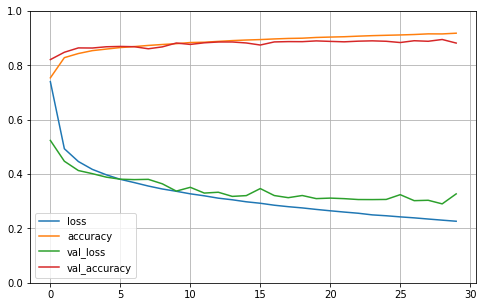

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. 

> **NOTE**
> 
> In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.
> 
> When plotting the training curve, it should be shifted by half an epoch to the left.

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the `fit()` method again, since Keras just continues training where it left off (you should be able to reach close to 89% validation accuracy).

If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the `fit()` method using the `batch_size` argument, which defaults to 32). We will get back to hyperparameter tuning at the end of this chapter. Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the `evaluate()` method (it also supports several other arguments, such as `batch_size` and `sample_weight`; please check the documentation for more details):

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.8697 - accuracy: 0.8524


[64.86969757080078, 0.852400004863739]

As we saw in `Chapter 2`, it is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). **Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic**.

##### Using the model to make predictions
Next, we can use the model’s `predict()` method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first three instances of the test set:

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the first image it estimates that the probability of class 9 (ankle boot) is `96%`, the probability of class 5 (sandal) is `3%`, the probability of class 7 (sneaker) is `1%`, and the probabilities of the other classes are negligible. In other words, it “believes” the first image is footwear, most likely ankle boots but possibly sandals or sneakers. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the `predict_classes()` method instead:

In [19]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

Here, the classifier actually classified all three images correctly (these images are shown in `Figure 10-13`):

<img src="images/10_13.png" style="width:500px;"/>

In [20]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Now you know how to use the `Sequential` API to build, train, evaluate, and use a classification `MLP`. But what about regression?

### 10.2.3 Building a Regression MLP Using the Sequential API
Let’s switch to the `California housing` problem and tackle it using a regression neural network. For simplicity, we will use `Scikit-Learn`’s `fetch_california_housing()` function to load the data. This dataset is simpler than the one we used in `Chapter 2`, since it contains only numerical features (there is no `ocean_proximity` feature), and there is no missing value. After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features:

In [21]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

Using the `Sequential` API to build, train, evaluate, and use a regression `MLP` to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the `mean squared error`. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) 
mse_test = model.evaluate(X_test, y_test) 

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8227 - val_loss: 0.5757
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9450 - val_loss: 0.5369
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7778 - val_loss: 0.5012
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4648 - val_loss: 0.4702
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4409 - val_loss: 0.4573
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.4432
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4170 - val_loss: 0.4314
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4073 - val_loss: 0.4233
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.4172
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3980 - val_loss: 0.4149

In [23]:
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)
y_pred

array([[5.2161274],
       [2.4188955],
       [2.565452 ]], dtype=float32)

As you can see, the `Sequential` API is quite easy to use. However, although `Sequential` models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, `Keras` offers the `Functional` API.

### 10.2.4 Building Complex Models Using the Functional API
One example of a nonsequential neural network is a `Wide & Deep neural network`. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer, as shown in `Figure 10-14`. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular `MLP` forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

<img src="images/10_14.png" style="width:500px;"/>

Let’s build such a neural network to tackle the `California housing` problem:

In [24]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2]) 
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

Let’s go through each line of this code:
+ First, we need to create an `Input` object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly.
+ Next, we create a `Dense layer` with 30 neurons, using the `ReLU` activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the `Functional` API. Note that we are just telling `Keras` how it should connect the layers together; no actual data is being processed yet.
+ We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.
+ Next, we create a `Concatenate layer`, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the `keras.layers.concatenate()` function, which creates a `Concatenate layer` and immediately calls it with the given inputs.
+ Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.
+ Lastly, we create a `Keras` `Model`, specifying which inputs and outputs to use.

Once you have built the `Keras model`, everything is exactly like earlier, so there’s no need to repeat it here: you must compile the model, train it, evaluate it, and use it to make predictions.

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path (see `Figure 10-15`)? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

<img src="images/10_15.png" style="width:500px;"/>

In [25]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) 
output = keras.layers.Dense(1, name="output")(concat) 
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

The code is self-explanatory. You should name at least the most important layers, especially when the model gets a bit complex like this. Note that we specified `inputs=[input_A, input_B]` when creating the model. Now we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input matrix `X_train`, we must pass a pair of matrices `(X_train_A, X_train_B)`: one per input. The same is true for `X_valid`, and also for `X_test` and `X_new` when you call `evaluate()` or `predict()`:

In [26]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid)) 
mse_test = model.evaluate((X_test_A, X_test_B), y_test) 
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6606 - val_loss: 0.8466
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7606 - val_loss: 0.7518
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6980 - val_loss: 0.7045
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6558 - val_loss: 0.6683
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6224 - val_loss: 0.6352
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5945 - val_loss: 0.6087
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5704 - val_loss: 0.5863
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5510 - val_loss: 0.5672
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5354 - val_loss: 0.5577
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5237 - val_loss: 0.5425

There are many use cases in which you may want to have multiple outputs:
+ The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
+ Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.
+ Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see `Figure 10-16`) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

<img src="images/10_16.png" style="width:500px;"/>

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs. For example, the following code builds the network represented in `Figure 10-16`:

```python
# [...]
# Same as above, up to the main output layer 
output = keras.layers.Dense(1, name="main_output")(concat) 
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) 
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
```

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses  (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, `Keras` will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model:

```python
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
```

Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing `y_train`, we need to pass `(y_train, y_train)` (and the same goes for `y_valid` and `y_test`):

```python
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
```

When we evaluate the model, `Keras` will return the total loss, as well as all the individual losses:

```python
total_loss, main_loss, aux_loss = model.evaluate( [X_test_A, X_test_B], [y_test, y_test])
```

Similarly, the `predict()` method will return predictions for each output:

```python
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
```

As you can see, you can build any sort of architecture you want quite easily with the `Functional` API. Let’s look at one last way you can build `Keras` models.

### 10.2.5 Using the Subclassing API to Build Dynamic Models
Both the `Sequential` API and the `Functional` API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the `Subclassing` API is for you.

Simply subclass the `Model` class, create the layers you need in the constructor, and use them to perform the computations you want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with the `Functional` API. You can then compile it, evaluate it, and use it to make predictions, exactly like we just did:

In [27]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name) 
        self.hidden1 = keras.layers.Dense(units, activation=activation) 
        self.hidden2 = keras.layers.Dense(units, activation=activation) 
        self.main_output = keras.layers.Dense(1) 
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs 
        hidden1 = self.hidden1(input_B) 
        hidden2 = self.hidden2(hidden1) 
        concat = keras.layers.concatenate([input_A, hidden2]) 
        main_output = self.main_output(concat) 
        aux_output = self.aux_output(hidden2) 
        return main_output, aux_output

model = WideAndDeepModel()

This example looks very much like the `Functional` API, except we do not need to create the inputs; we just use the input argument to the `call()` method, and we separate the creation of the layers in the constructor from their usage in the `call()` method. The big difference is that you can do pretty much anything you want in the `call()` method: `for` loops, `if` statements, low-level TensorFlow operations—your imagination is the limit (see `Chapter 12`)! This makes it a great API for researchers experimenting with new ideas.

This extra flexibility does come at a cost: your model’s architecture is hidden within the `call()` method, so `Keras` cannot easily inspect it; it cannot save or clone it; and when you call the `summary()` method, you only get a list of layers, without any information on how they are connected to each other. Moreover, `Keras` cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the `Sequential` API or the `Functional` API.

> `Keras` models can be used just like regular layers, so you can easily combine them to build complex architectures.

Now that you know how to build and train neural nets using `Keras`, you will want to save them!

### 10.2.6 Saving and Restoring a Model
When using the `Sequential` API or the `Functional` API, saving a trained `Keras` model is as simple as it gets:

```python
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...]) 
model.fit([...]) 
model.save("my_keras_model.h5")
```

`Keras` will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have). In `Chapter 19`, we will see how to save a `tf.keras` model using `TensorFlow`’s `SavedModel` format instead.

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

```python
model = keras.models.load_model("my_keras_model.h5")
```

> This will work when using the `Sequential` API or the `Functional` API, but unfortunately not when using model subclassing. You can use `save_weights()` and `load_weights()` to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the `fit()` method to save checkpoints? Use callbacks.

### 10.2.7 Using Callbacks
The `fit()` method accepts a callbacks argument that lets you specify a list of objects that `Keras` will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

```python
# [...] 
# build and compile the model 
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
```

Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the `ModelCheckpoint`. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. The following code is a simple way to implement early stopping (introduced in `Chapter 4`):

```python
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) 
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb]) 
# roll back to best model
model = keras.models.load_model("my_keras_model.h5") 
```

Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources):

```python
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])
```

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the `EarlyStopping` callback will keep track of the best weights and restore them for you at the end of training.

> There are many other callbacks available in the `keras.callbacks` package.

If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

```python
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
```

As you might expect, you can implement `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_epoch_end()`, `on_batch_begin()`, and `on_batch_end()`. Callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, or `on_test_batch_end()` (called by `evaluate()`), and for prediction you should implement `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by `predict()`).

Now let’s take a look at one more tool you should definitely have in your toolbox when using `tf.keras`: TensorBoard.

### 10.2.8 Using TensorBoard for Visualization
TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more! This tool is installed automatically when you install TensorFlow, so you already have it.

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called `event files`. Each binary data record is called a `summary`. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay), such as the learning curves during training. In general, you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

Let’s start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it’s different at every run. You may want to include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in TensorBoard:

```python
import time
import os 

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# e.g., './my_logs/run_2019_06_07-15_15_22'
run_logdir = get_run_logdir() 
```

The good news is that `Keras` provides a nice `TensorBoard()` callback:

```python
# [...] 
# Build and compile your model 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) 
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[tensorboard_cb])
```

And that’s all there is to it! It could hardly be easier to use. If you run this code, the `TensorBoard()` callback will take care of creating the log directory for you (along with its parent directories if needed), and during training it will create event files and write summaries to them. After running the program a second time (perhaps changing some hyperparameter value), you will end up with a directory structure similar to this one:

<img src="images/a_10_01.png" style="width:600px;"/>

There’s one directory per run, each containing one subdirectory for training logs and one for validation logs. Both contain event files, but the training logs also include profiling traces: this allows TensorBoard to show you exactly how much time the model spent on each part of your model, across all your devices, which is great for locating performance bottlenecks.

Next you need to start the TensorBoard server. One way to do this is by running a command in a terminal. If you installed TensorFlow within a virtualenv, you should activate it. Next, run the following command at the root of the project (or from anywhere else, as long as you point to the appropriate log directory):

```bash
$ tensorboard --logdir=./my_logs --port=6006 
TensorBoard 2.0.0 at http://mycomputer.local:6006/ (Press CTRL+C to quit)
```

If your shell cannot find the tensorboard script, then you must update your `PATH` environment variable so that it contains the directory in which the script was installed (alternatively, you can just replace tensorboard in the command line with `python3 -m tensorboard.main`). Once the server is up, you can open a web browser and go to `http://localhost:6006`.

Alternatively, you can use TensorBoard directly within Jupyter, by running the following commands. The first line loads the TensorBoard extension, and the second line starts a TensorBoard server on port 6006 (unless it is already started) and connects to it:

```shell
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
```

Either way, you should see TensorBoard’s web interface. Click the `SCALARS` tab to view the learning curves (see `Figure 10-17`). At the bottom left, select the logs you want to visualize (e.g., the training logs from the first and second run), and click the `epoch_loss` scalar. Notice that the training loss went down nicely during both runs, but the second run went down much faster. Indeed, we used a learning rate of 0.05 (`optimizer=keras.optimizers.SGD(lr=0.05)`) instead of 0.001.

<img src="images/10_17.png" style="width:600px;"/>

You can also visualize the whole graph, the learned weights (projected to 3D), or the profiling traces. The `TensorBoard()` callback has options to log extra data too, such as `embeddings` (see `Chapter 13`).

Additionally, TensorFlow offers a lower-level API in the `tf.summary` package. The following code creates a `SummaryWriter` using the `create_file_writer()` function, and it uses this writer as a context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard (give it a try!):

```python
test_logdir = get_run_logdir() 
writer = tf.summary.create_file_writer(test_logdir) 

with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step) 
        data = (np.random.randn(100) + 2) * step / 100 # some random data 
        tf.summary.histogram("my_hist", data, buckets=50, step=step) 
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images 
        tf.summary.image("my_images", images * step / 1000, step=step) 
        texts = ["The step is " + str(step), "Its square is " + str(step**2)] 
        tf.summary.text("my_text", texts, step=step) 
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step) 
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1]) 
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
```

This is actually a useful visualization tool to have, even beyond TensorFlow or Deep Learning.

Let’s summarize what you’ve learned so far in this chapter: we saw where neural nets came from, what an `MLP` is and how you can use it for classification and regression, how to use `tf.keras`’s `Sequential` API to build `MLP`s, and how to use the `Functional` API or the `Subclassing` API to build more complex model architectures. You learned how to save and restore a model and how to use callbacks for checkpointing, early stopping, and more. Finally, you learned how to use TensorBoard for visualization. You can already go ahead and use neural networks to tackle many problems! However, you may wonder how to choose the number of hidden layers, the number of neurons in the network, and all the other hyperparameters. Let’s look at this now.

## 10.3 Fine-Tuning Neural Network Hyperparameters
The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple `MLP` you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use `K-fold` cross-validation). For example, we can use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space, as we did in `Chapter 2`. To do this, we need to wrap our `Keras` models in objects that mimic regular `Scikit-Learn` regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

```python
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1)) 
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
```

This function creates a simple `Sequential` model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an `SGD` optimizer configured with the specified learning rate. It is good practice to provide reasonable defaults to as many hyperparameters as you can, as `Scikit-Learn` does.

Next, let’s create a `KerasRegressor` based on this `build_model()` function:

```python
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
```

The `KerasRegressor` object is a thin wrapper around the `Keras` model built using `build_model()`. Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in `build_model()`. Now we can use this object like a regular `Scikit-Learn` regressor: we can train it using its `fit()` method, then evaluate it using its `score()` method, and use it to make predictions using its `predict()` method, as you can see in the following code:

```python
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]) 
mse_test = keras_reg.score(X_test, y_test) 
y_pred = keras_reg.predict(X_new)
```

Note that any extra parameter you pass to the `fit()` method will get passed to the underlying `Keras` model. Also note that the score will be the opposite of the `MSE` because `Scikit-Learn` wants scores, not losses (i.e., higher should be better).

We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search (as we discussed in `Chapter 2`). Let’s try to explore the number of hidden layers, the number of neurons, and the learning rate:

```python
from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV

param_distribs = { 
    "n_hidden": [0, 1, 2, 3], 
    "n_neurons": np.arange(1, 100), 
    "learning_rate": reciprocal(3e-4, 3e-2), 
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3) 
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
```

This is identical to what we did in `Chapter 2`, except here we pass extra parameters to the `fit()` method, and they get relayed to the underlying Keras models. Note that `RandomizedSearchCV` uses `K-fold` cross-validation, so it does not use `X_valid` and `y_valid`, which are only used for early stopping.

The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, and the values of `n_iter` and `cv`. When it’s over, you can access the best parameters found, the best score, and the trained `Keras` model like this:

```bash
>>> rnd_search_cv.best_params_
{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

>>> rnd_search_cv.best_score_
-0.3189529188278931

>>> model = rnd_search_cv.best_estimator_.model
```

You can now save this model, evaluate it on the test set, and, if you are satisfied with its performance, deploy it to production. Using randomized search is not too hard, and it works well for many fairly simple problems. When training is slow, however (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This approach will hopefully zoom in on a good set of hyperparameters. However, it’s very time consuming, and probably not the best use of your time.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. Such techniques take care of the “zooming” process for you and lead to much better solutions in much less time. Here are some Python libraries you can use to optimize hyperparameters:
+ **Hyperopt**: A popular library for optimizing over all sorts of complex search spaces (including real values, such as the learning rate, and discrete values, such as the number of layers).
+ **Hyperas, kopt, or Talos**: Useful libraries for optimizing hyperparameters for `Keras` models (the first two are based on `Hyperopt`).
+ **Keras Tuner**: An easy-to-use hyperparameter optimization library by Google for `Keras` models, with a hosted service for visualization and analysis.
+ **Scikit-Optimize (skopt)**: A general-purpose optimization library. The `BayesSearchCV` class performs `Bayesian` optimization using an interface similar to `GridSearchCV`.
+ **Spearmint**: A `Bayesian` optimization library.
+ **Hyperband**: A fast hyperparameter tuning library based on the recent `Hyperband` paper by Lisha Li et al.
+ **Sklearn-Deap**: A hyperparameter optimization library based on evolutionary algorithms, with a `GridSearchCV`-like interface.

Moreover, many companies offer services for hyperparameter optimization. We’ll discuss Google Cloud AI Platform’s hyperparameter tuning service in `Chapter 19`. Other options include services by `Arimo` and `SigOpt`, and `CallDesk`’s Oscar.

Hyperparameter tuning is still an active area of research, and evolutionary algorithms are making a comeback. For example, check out `DeepMind`’s excellent 2017 paper, where the authors jointly optimize a population of models and their hyperparameters. Google has also used an evolutionary approach, not just to search for hyperparameters but also to look for the best neural network architecture for the problem; their `AutoML` suite is already available as a cloud service. Perhaps the days of building neural networks manually will soon be over? Check out `Google`’s post on this topic. In fact, evolutionary algorithms have been used successfully to train individual neural networks, replacing the ubiquitous `Gradient Descent`! For an example, see the 2017 post by `Uber` where the authors introduce their `Deep Neuroevolutio`n technique.

But despite all this exciting progress and all these tools and services, it still helps to have an idea of what values are reasonable for each hyperparameter so that you can build a quick prototype and restrict the search space. The following sections provide guidelines for choosing the number of hidden layers and neurons in an `MLP` and for selecting good values for some of the main hyperparameters.

### 10.3.1 Number of Hidden Layers
For many problems, you can begin with a single hidden layer and get reasonable results. An `MLP` with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

To understand why, suppose you are asked to draw a forest using some drawing software, but you are forbidden to copy and paste anything. It would take an enormous amount of time: you would have to draw each tree individually, branch by branch, leaf by leaf. If you could instead draw one leaf, copy and paste it to draw a branch, then copy and paste that branch to create a tree, and finally copy and paste this tree to make a forest, you would be finished in no time. Real-world data is often structured in such a hierarchical way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help `DNN`s converge faster to a good solution, but it also improves their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called `transfer learning`.

In summary, for many problems you can start with just one or two hidden layers and the neural network will work just fine. For instance, you can easily reach above `97%` accuracy on the `MNIST` dataset using just one hidden layer with a few hundred neurons, and above `98%` accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones, as we will see in `Chapter 14`), and they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will then be a lot faster and require much less data (we will discuss this in `Chapter 11`).

### 10.3.2 Number of Neurons per Hidden Layer
The number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the `MNIST` task requires 28 × 28 = 784 input neurons and 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for `MNIST` might have 3 hidden layers, the first with 300 neurons, the second with 200, and the third with 100. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. But in practice, it’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting. Vincent Vanhoucke, a scientist at Google, has dubbed this the `stretch pants` approach: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size. With this approach, you avoid bottleneck layers that could ruin your model. On the flip side, if a layer has too few neurons, it will not have enough representational power to preserve all the useful information from the inputs (e.g., a layer with two neurons can only output 2D data, so if it processes 3D data, some information will be lost). No matter how big and powerful the rest of the network is, that information will never be recovered.

> In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons per layer.

### 10.3.3 Learning Rate, Batch Size, and Other Hyperparameters
The numbers of hidden layers and neurons are not the only hyperparameters you can tweak in an `MLP`. Here are some of the most important ones, as well as tips on how to set them:

##### Learning rate
The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges, as we saw in `Chapter 4`). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$) and gradually increasing it up to a very large value (e.g., $10$). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by $\exp(\log(10^6 )/500$) to go from $10^{-5}$ to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate. We will look at more learning rate techniques in `Chapter 11`.

##### Optimizer
Choosing a better optimizer than plain old `Mini-batch Gradient Descent` (and tuning its hyperparameters) is also quite important. We will see several advanced optimizers in `Chapter 11`.

##### Batch size
The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently (see `Chapter 19`), so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. In April 2018, Yann LeCun even tweeted “Friends don’t let friends use mini-batches larger than 32,” citing a 2018 paper by Dominic Masters and Carlo Luschi which concluded that using small batches (from 2 to 32) was preferable because small batches led to better models in less training time. Other papers point in the opposite direction, however; in 2017, papers by Elad Hoffer et al and Priya Goyal et al showed that it was possible to use very large batch sizes (up to 8,192) using various techniques such as warming up the learning rate (i.e., starting training with a small learning rate, then ramping it up, as we will see in `Chapter 11`). This led to a very short training time, without any generalization gap. So, one strategy is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead.

##### Activation function
We discussed how to choose the activation function earlier in this chapter: in general, the `ReLU` activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.

##### Number of iterations
In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.

> The optimal learning rate depends on the other hyperparameters--especially the batch size--so if you modify any hyperparameter, make sure to update the learning rate as well.

For more best practices regarding tuning neural network hyperparameters, check out the excellent [2018 paper by Leslie Smith](https://arxiv.org/abs/1803.09820).

This concludes our introduction to artificial neural networks and their implementation with `Keras`. In the next few chapters, we will discuss techniques to train very deep nets. We will also explore how to customize models using `TensorFlow`’s lower-level API and how to load and preprocess data efficiently using the `Data` API. And we will dive into other popular neural network architectures: convolutional neural networks for image processing, recurrent neural networks for sequential data, autoencoders for representation learning, and generative adversarial networks to model and generate data.